In [52]:
import numpy as np
import pandas as pd
import os
import PIL
from PIL import Image
import tensorflow as tf
import selenium
from selenium import webdriver
import time
import requests
import io
import hashlib

In [53]:
import selenium
# This is the path I use
# DRIVER_PATH = '.../Desktop/Scraping/chromedriver 2'
# Put the path for your ChromeDriver here
DRIVER_PATH = '../assets/chromedriver.exe'
wd = webdriver.Chrome(executable_path=DRIVER_PATH)

In [54]:
wd.quit()

In [55]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [56]:
def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")


In [71]:
def search_and_download(search_term:str,
                        driver_path:str,
                        target_path='../data/flowers',
                        number_images=5):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term  + ' -inurl:alamy.com -inurl:dreamstime.com -inurl:istockphoto.com -inurl:vectorstock.com -inurl:nparks.com -inurl:nparks.gov.sg -inurl:shutterstock.com -inurl:canstockphoto.com',
                               number_images,
                               wd=wd,
                               sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

In [106]:
most_common_flowering_plants = ['adenium obesum', 
                                'allamanda cathartica',
                                'allamanda blanchetti',
                                'alpinia purpurata', 
                                'anthurium andreanum',
                                'aranda',
                                'ardisia crenata',
                                'ardisia lanceolata',
                                'ardisia elliptica',
                                'asclepias currassavica',
                                'aystasia gangetica',
                                'aystasia nemorum',
                                'bauhinia acuminata',
                                'bauhinia aureifolia',
                                'bauhinia galpinii',
                                'bauhinia kockiana',
                                'bauhinia monandra',
                                'bougainvillea',
                                'brunfelsia americana',
                                'brunfelsia lactea',
                                'brunfelsia pauciflora',
                                'caesalpinia pulcherrima',
                                'calliandra haematocephala',
                                'catharanthus roseus',
                                'celosia argentea',
                                'cerbera manghas',
                                'cestrum aurantiacum',
                                'cestrum diurnum',
                                'clerodendrum buchananii',
                                'clerodendrum chinense',
                                'clerodendrum indicum',
                                'clerodendrum splendens', 
                                'clerodendrum thomsoniae',
                                'clitorea ternatea',
                                'cosmos bipinnatus',
                                'comos caudatus',
                                'cosmos sulphureus',
                                'costus woodsonii',
                                'crinum asiaticum',
                               'crinum xanthophyllum',
                               'crinum amabile',
                               'cuphea hyssopifolia',
                               'dianthus barbatus',
                               'cymbidium',
                               'cyrtophyllum fragrans',
                               'dalbergia cochinchinensis',
                               'dalbergia latifolia',
                               'dalbergia oliveri',
                               'delonix regia',
                               'ipomoea aquatica',
                               'ipomoea batatas',
                               'ipomoea mauritiana',
                               'ipomoea pes-caprae',
                               'ipomoea tricolor',
                               'jasminum multiflorum',
                               'podranea ricasoliana',
                               'quisqualis conferta',
                               'quisqualis indica',
                               'sphagneticola trilobata',
                               'strophanthus gratus',
                               'thunbergia alata',
                               'thunbergia fragrans',
                               'thunbergia grandiflora',
                               'thunbergia laurifolia',
                               'tristellateia australasiae',
                               'vallaris glabra',
                               'melinis nerviglumis',
                                'pennisetum alopecuroides',
                               'pennisetum setaceum',
                               'dendrobium',
                                'encyclia cordigera',
                               'encyclia radiata',
                               'guzmania',
                               'hoya archiboldiana',
                                'hoya benitotanii',
                               'hoya buotii',
                               'hoya carnosa',
                               'phalaenopsis',
                                'tillandsia',
                                'tolumnia',
                               'vanda',
                               'amaranthus tricolor',
                               'arundina',
                               'angelonia biflora',
                                'begonia',
                                'calathea',
                               'canna',
                               'helianthus annuus',
                               'hedychium coronarium',
                               'heliconia bihai',
                               'heliconia chartacea',
                               'heliconia x nickeriensis',
                               'heliconia psittacorum',
                               'heliconia rostrata',
                               'impatiens hawkeri',
                               'impatiens walleriana',
                               'nymphaea',
                               'paphiopedilum concolor',
                               'papilionanthe',
                               'pentas lanceolata',
                               'petunia',
                                'spathiphyllum wallisii',
                                'spathoglottis plicata',
                               'tagetes erecta',
                               'torenia fournieri',
                               'zephyranthes',
                               'acanthus',
                               'aglaia odorata',
                               'arachnothryx leucophylla',
                               'carmona retusa',
                                'cascabela thevetia',
                               'fagraea auriculata',
                               'fagraea ceilanica',
                               'galphinia glauca',
                               'gardenia jasminoides',
                               'gardenia mutabilis',
                               'gardenia scabrella',
                               'gardenia vietnamensis',
                               'hamelia patens',
                               'hibiscus acetosella',
                               'hibiscus coccineus',
                               'hibiscus mutabilis',
                               'hibiscus rosa-sinensis',
                               'hibscus sabdariffa',
                               'hydrangea macrophylla',
                               'ixora congesta',
                               'ixora javanica',
                               'ixora finlaysoniana',
                               'ixora chinensis',
                               'jasminum laurifolium',
                               'jasminum sambac',
                               'jatropha integerrima',
                               'lagerstroemia indica',
                               'lantana camara',
                               'lantana montevidensis',
                               'lantana trifolia',
                               'leucophyllum frutescens',
                               'malpighia glabra',
                               'malpighia punicifolia',
                               'melastoma malabathricum',
                               'murraya koenigii',
                               'murraya paniculata',
                               'mussaenda erythrophylla',
                               'mussaenda philippica',
                               'nerium oleander',
                               'nyctanthes arbor-tristis',
                               'ochna kirkii',
                               'osmanthus fragrans',
                               'pleiocarpa mutica',
                               'plumbago auriculata',
                               'portlandia grandiflora',
                               'pseuderanthemum andersonii',
                               'pseuderanthemum bicolor',
                               'pseuderanthemum laxiflorum',
                               'pseuderanthemum sinuatum',
                               'pseudomussaenda flava',
                               'punica granatum',
                               'radermachera sinica',
                               'ravenia spectabilis',
                               'reinwardtia indica',
                               'rhaphiolepis indica',
                               'rhododendron indicum',
                               'rhodomyrtus tomentosa',
                               'rosa chinensis',
                               'rosmarinus officinalis',
                               'rotheca myricoides',
                                'ruspolia seticalyx',
                                'russelia equisetiformis',
                                'scyphiphora hydrophyllacea',
                                'senna pendula',
                                'senna polyphylla',
                                'senna surattensis',
                                'stachytarpheta indica',
                                'syzygium buxifolium',
                                'tabernaemontana africana',
                                'tabernaemontana corymbosa',
                                'tabernaemontana divaricata',
                                'tecoma capensis',
                                'tibouchina lepidota',
                                'tithonia diversifolia',
                                'urena lobata',
                                'wrightia antidysenterica',
                                'wrightia dubia',
                                'wrightia religiosa',
                                'bauhinia monandra',
                                'calliandra tergemina',
                                'callistemon viminalis',
                                'cananga odorata',
                                'cassia javanica',
                                'ceiba speciosa',
                                'cerbera manghas',
                                'clitoria fairchildiana',
                                'cochlospermum religiosum',
                                'cordia sebestena',
                                'cratoxylum formosum',
                                'cratoxylum maingayi',
                                'dillenia excelsa',
                                'dillenia ovata',
                                'dillenia philippinensis',
                                'dillenia suffruticosa',
                                'dryobalanops aromatica',
                                'elaeocarpus angustifolius',
                                'elaeocarpus grandiflorus',
                                'garcinia hombroniana',
                                'garcinia mangostana',
                                'garcinia nervosa',
                                'gardenia carinata',
                                'gardenia tubifera',
                                'gustavia superba',
                                'jacaranda obtusifolia',
                                'kleinhovia hospita',
                                'kopsia arborea',
                                'kopsia fruticosa',
                                'kopsia singapurensis',
                                'lagerstroemia loudonii',
                                'lagerstroemia speciosa',
                                'lagerstroemia tomentosa',
                                'lumnitzera littorea',
                                'magnolia champaca',
                                'maniltoa browneoides',
                                'maniltoa lenticellata',
                                'melaleuca bracteata',
                                'melaleuca cajuputi',
                                'memecylon edule',
                                'mesua ferrea',
                                'mitrephora teysmannii',
                                'moringa oleifera',
                                'ochrosia oppositifolia',
                                'peltophorum pterocarpum',
                                'plumeria obtusa',
                                'plumeria pudica',
                                'pteleocarpa lamponga',
                                'pterocarpus indicus',
                                'samanea saman',
                                'saraca declinata',
                                'saraca indica',
                                'saraca thaipingensis',
                                'schefflera actinophylla',
                                'senna spectabilis',
                                'shorea bracteolata',
                                'solanum wrightii',
                                'syzygium malaccense',
                                'syzygium pachyphyllum',
                                'syzygium polyanthum',
                                'tabebuia aurea',
                                'tabebuia heterophylla',
                                'tabebuia pallida',
                                'tabebuia rosea',
                                'talipariti tiliaceum',
                                'tarenna fragrans',
                                'tecoma stans',
                                'tectona grandis',
                                'thespesia populnea',
                                'xanthostemon chrysanthus'
                               ]

In [91]:
len(most_common_flowering_plants)

253

In [101]:
most_common_flowering_plants.index('syzygium malaccense')

240

Found: 100 search results. Extracting links from 0:100
Found: 100 image links, done!
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHT-GNcn9khb7LQs3e3THEO7N_uvTWTdoYZg&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\02e8cc419a.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuD1cNNtJy0y0FUF_Cky81tzM6UeFfijwUsg&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\b08ba7454d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYE_s7C7StkCviwGFFhEFXfCyU5SyF7Yw5Gg&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\03a1ac666d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfIasadUSDMfSvTmmKsYBMy_KbW6ar9Taz4A&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\5ddfa627e8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRB09tq4tlZst9reGfNHdyJcRIBpbNBhhJFtg&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\ff1295b318.jpg
SUCCESS - saved http

SUCCESS - saved https://efloraofindia.com/wp-content/uploads/2020/10/IMG_2725-7.jpg - as ../data/flowers\syzygium_polyanthum_flower\8da67b1de2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQL77L4MXeOUpLTwxxaKsvF4I3ySYAfJFCapg&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\b026ec4e01.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmbz2KusIY4N_GWaymgjtgepqSF-Smfdnkzg&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\b15ed4ed00.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQfOsiIXBPRA8e8FNdtMksik4z3A_Va-2HtFA&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\c6803b2da8.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSrosqFRJONydap5B4WyQxxZ8AwsP7Ts4Oq7Q&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\7c8986d6bb.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjqVfvQbWBEy1DshVI7Mi5R-PLBv9wHvBlgA&usqp=CAU - as ../data/flowers\

ERROR - Could not save http://tropical.theferns.info/plantimages/2/a/2a8bd4e5c08c7bcb370b5d1f1e0b00c2f332053d.jpg - cannot identify image file <_io.BytesIO object at 0x000001E6D3C21828>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQiglT0SsF5m3hpZiEV7F3tKRyY7HFoXP09Yg&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\35d309a29a.jpg
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Syzy_polyan_070404-3396_sbrg.jpg/800px-Syzy_polyan_070404-3396_sbrg.jpg - as ../data/flowers\syzygium_polyanthum_flower\58867d487c.jpg
SUCCESS - saved https://uforest.org/plants/images/syzygium_polyanthum1.jpg - as ../data/flowers\syzygium_polyanthum_flower\e4113a22ba.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcROePlemiD-_nyNqVQSPiUzZUhAkZpcDDeMEg&usqp=CAU - as ../data/flowers\syzygium_polyanthum_flower\0afd5e9e3b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeX6JRKlsnabo52V6F1rWcw9w0cxZ_GlvNoA&us

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpHhm3muLWSRSim76m5-1GUJzSHVjogwiH1w&usqp=CAU - as ../data/flowers\tabebuia_aurea_flower\6aa44c407c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuCOWDq39SkPCCZQQbo3dqSqi8yD7AB9rvNQ&usqp=CAU - as ../data/flowers\tabebuia_aurea_flower\3380e1c7ca.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjlC_U4g-7hRJvcMPoIFYMDzY7lJHZp2rnnw&usqp=CAU - as ../data/flowers\tabebuia_aurea_flower\665a2c9be7.jpg
SUCCESS - saved https://www.jcu.edu.au/__data/assets/image/0006/95946/366206.3.jpg - as ../data/flowers\tabebuia_aurea_flower\0c55bd02f5.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT-SxDf1OikX8JMGoT9vUuRksOFrF44-tNozw&usqp=CAU - as ../data/flowers\tabebuia_aurea_flower\7f7bfdbc37.jpg
SUCCESS - saved https://st2.depositphotos.com/1155346/7569/i/450/depositphotos_75690741-stock-photo-silver-trumpet-tree.jpg - as ../data/flowers\tabebuia_aurea_flo

SUCCESS - saved https://st3.depositphotos.com/1298455/35747/i/1600/depositphotos_357478838-stock-photo-tabebuia-aurea-flowers-blooming-green.jpg - as ../data/flowers\tabebuia_aurea_flower\6d07e976b6.jpg
SUCCESS - saved https://www.itslife.in/wp-content/uploads/2013/10/garden-tabebuia-aurea4-1280x720.jpg - as ../data/flowers\tabebuia_aurea_flower\62de284d83.jpg
SUCCESS - saved https://alchetron.com/cdn/tabebuia-aurea-fa679d9e-e6bd-4160-9b62-36e4df6e1eb-resize-750.jpg - as ../data/flowers\tabebuia_aurea_flower\8137d29067.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRsUbZMvATmlnWJYxqpElI54MUCVG4LAhQgQQ&usqp=CAU - as ../data/flowers\tabebuia_aurea_flower\36d1e9a15c.jpg
SUCCESS - saved https://www.researchgate.net/profile/Sheeba_Irwin2/publication/272354595/figure/fig22/AS:614376893591553@1523490274421/A-Syzygium-cumini-flower-B-Syzygium-cumini-fruits-C-Tabebuia-aurea-D-Tabebuia.png - as ../data/flowers\tabebuia_aurea_flower\f39189af8d.jpg
SUCCESS - saved https:

SUCCESS - saved https://static.vecteezy.com/system/resources/previews/005/409/116/large_2x/selective-focus-soft-light-beautiful-pink-trumpet-flower-or-tabebuia-heterophylla-free-photo.jpg - as ../data/flowers\tabebuia_heterophylla_flower\1df62d4310.jpg
SUCCESS - saved https://media.gettyimages.com/photos/brazil-southern-pantanal-caiman-ranch-pink-trumpet-tree-tabebuia-of-picture-id453560444?s=612x612 - as ../data/flowers\tabebuia_heterophylla_flower\a3b2e8a885.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSwRgD77Txipr0DHtFF67VkqHavfav_iJOkg&usqp=CAU - as ../data/flowers\tabebuia_heterophylla_flower\8e51fe388c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQHLtiDHexoyyTBB4ZGOkqMIuN-0GmnP8710A&usqp=CAU - as ../data/flowers\tabebuia_heterophylla_flower\80a3e5aa13.jpg
SUCCESS - saved https://www.monaconatureencyclopedia.com/wp-content/uploads/2009/01/jpg_Tabebuia_pallida.jpg - as ../data/flowers\tabebuia_heterophylla_flower\270eb79165

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHjH1itLOtY6zINi8gVNACMCA0bTxMTCZglA&usqp=CAU - as ../data/flowers\tabebuia_heterophylla_flower\335ca4480e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTVwK6P-2kThYhDdeKbV81Uta4vkjFHTlvstA&usqp=CAU - as ../data/flowers\tabebuia_heterophylla_flower\0bcabdfbec.jpg
SUCCESS - saved https://i.etsystatic.com/14792178/r/il/c4ce1f/1794917155/il_570xN.1794917155_n94f.jpg - as ../data/flowers\tabebuia_heterophylla_flower\e3e8e41eaf.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWDE-ka8JFElqEgFkFVkcafzObs3YHV3pf4w&usqp=CAU - as ../data/flowers\tabebuia_heterophylla_flower\4e4668ea18.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfs3BeCqeWPMVPLKuMKxtlMbR_kIS7LlP0rw&usqp=CAU - as ../data/flowers\tabebuia_heterophylla_flower\173ca85358.jpg
SUCCESS - saved https://www.researchgate.net/profile/Tamara-Heartsill-Scalley/publication/286071574/figure/fi

SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Caribbean_Trumpet_Tree_%28Tabebuia_aurea%29_fruit_%26_flowers_W_IMG_7055.jpg/640px-Caribbean_Trumpet_Tree_%28Tabebuia_aurea%29_fruit_%26_flowers_W_IMG_7055.jpg - as ../data/flowers\tabebuia_pallida_flower\6fc4f93c40.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR31ZM1Tg6z3g70jxAe_toRcbKw4sOgSULw4A&usqp=CAU - as ../data/flowers\tabebuia_pallida_flower\96a8e70fd2.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSj9j__pE0eylCC86WAZN6iQd9LjLKwTGZMuw&usqp=CAU - as ../data/flowers\tabebuia_pallida_flower\94d4ecad3c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRi_xp0KRqTBRF7pA99AyArQMc-cVUknjILRA&usqp=CAU - as ../data/flowers\tabebuia_pallida_flower\50c28c1880.jpg
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Tabebuia_rosea_0001.jpg/440px-Tabebuia_rosea_0001.jpg - as ../data/flowers\tabebuia_pallida_flower\bf412

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQo-jlVkrnc3VL0W6FqlDJK7kUiHu0benx-zw&usqp=CAU - as ../data/flowers\tabebuia_pallida_flower\6fa524722a.jpg
SUCCESS - saved https://www.singapore.biodiversity.online/images/speciesThumbnailImages/high/c10bf461-c823-edc6-abc6-2bf9d4681e04.jpg - as ../data/flowers\tabebuia_pallida_flower\50f18071e4.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHPvNqoiyjan1F8z0Ibpk7qzOtdckIlLEdEg&usqp=CAU - as ../data/flowers\tabebuia_pallida_flower\09dcc020c5.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWDmiXZ_1PpgZvUlOD3R-T-zo3KiLN6VQbjA&usqp=CAU - as ../data/flowers\tabebuia_pallida_flower\6ba02c488c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBD7m98-KU14kGcRNNnUtc5IdfdQKXeSK8Hg&usqp=CAU - as ../data/flowers\tabebuia_pallida_flower\6ad56f0012.jpg
SUCCESS - saved https://ak.picdn.net/shutterstock/videos/30858025/thumb/1.jpg - as ../data/flowers\tab

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQQ6ByFDN2xydtQm6dAKiQtuiO8vFtfACiPcg&usqp=CAU - as ../data/flowers\tabebuia_rosea_flower\198c241683.jpg
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Tabebuia_rosea_0001.jpg/440px-Tabebuia_rosea_0001.jpg - as ../data/flowers\tabebuia_rosea_flower\bf412cd33c.jpg
SUCCESS - saved https://singapore.biodiversity.online/images/speciesImages/medium/2c35db1c-5c41-b039-90ff-16e2e68d694e.jpg - as ../data/flowers\tabebuia_rosea_flower\373373b2ec.jpg
SUCCESS - saved https://nurserynisarga.in/wp-content/uploads/2021/09/tabebuia-rosea-new.jpg - as ../data/flowers\tabebuia_rosea_flower\1cc1dae0ae.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5fQShsgTa2-uNAJV7IFxivHWpiNmAsXy1XA&usqp=CAU - as ../data/flowers\tabebuia_rosea_flower\c41b076543.jpg
SUCCESS - saved https://www.backyardnature.net/chiapas/tababui1.jpg - as ../data/flowers\tabebuia_rosea_flower\e4bf1e4973.jpg
SUCCESS -

SUCCESS - saved https://www.backyardnature.net/chiapas/tababui2.jpg - as ../data/flowers\tabebuia_rosea_flower\ac17f263a3.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3wxu947u9MwgTwGxz82mlptQ8SguDAKaCwQ&usqp=CAU - as ../data/flowers\tabebuia_rosea_flower\bb9b06962d.jpg
ERROR - Could not save http://www.flowerspicture.org/enlarge/t/tabebuia_rosea.jpg - cannot identify image file <_io.BytesIO object at 0x000001E6D3D19B28>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQv1po3Ngx8cm8i9XoafGb0Vec0gjxZ5IIbGw&usqp=CAU - as ../data/flowers\tabebuia_rosea_flower\3238f2c579.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQTKDn9rVMq7G7OvZEF3zzPHTgMmqw6qphW4g&usqp=CAU - as ../data/flowers\tabebuia_rosea_flower\a366c926c7.jpg
SUCCESS - saved https://i.pinimg.com/originals/b6/f4/0f/b6f40f7216050202a98c43cfc96f6a24.jpg - as ../data/flowers\tabebuia_rosea_flower\3f38f11075.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.

SUCCESS - saved https://1.bp.blogspot.com/-w3WdNTh_KDM/XKjMSH5N5nI/AAAAAAAATI4/Gk54IlzI83Mic7zUBH_rPuAmx0UYxwHDACLcBGAs/s1600/Shomudro_joba_Sea_hibiscus_talipariti_tiliaceum_03.JPG - as ../data/flowers\talipariti_tiliaceum_flower\8692c3217e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAa2FknQTjSoLeW1LN3N7JHM5YMCQFO_YCkw&usqp=CAU - as ../data/flowers\talipariti_tiliaceum_flower\e9144e8e22.jpg
SUCCESS - saved https://toptropicals.com/pics/garden/04/bloom/0417.jpg - as ../data/flowers\talipariti_tiliaceum_flower\86d7135445.jpg
SUCCESS - saved https://photoplusbyritasim.files.wordpress.com/2012/05/dscf5698-400copy.jpg - as ../data/flowers\talipariti_tiliaceum_flower\4e6b2f9d83.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRxr8QkFCUsrassL7vqPcymDcVHmn95sWLNRA&usqp=CAU - as ../data/flowers\talipariti_tiliaceum_flower\bc2b4bcffd.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQb0mxpbO-RO2tvaFzAjM_C2NpD_nZgZWs5

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRn8XHOMkqJ75YE1F4k41LTqFoivisG7y2pDg&usqp=CAU - as ../data/flowers\talipariti_tiliaceum_flower\a73065a04e.jpg
SUCCESS - saved https://live.staticflickr.com/5214/5386098133_aa8a8883dc_b.jpg - as ../data/flowers\talipariti_tiliaceum_flower\9e49772204.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjMJR8xqQa7OhIc3bFC4b1hBYgr-q0dj82DA&usqp=CAU - as ../data/flowers\talipariti_tiliaceum_flower\0b4e884ae1.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZTn-iIsW9N1SNT6AFxkqYoJM8CeEvtHdFbw&usqp=CAU - as ../data/flowers\talipariti_tiliaceum_flower\387d816f63.jpg
SUCCESS - saved https://lh3.googleusercontent.com/tNkduKxHOySvGIIBp3UrvCUOJxHwH-A_slYF4Uuuwp8lZUhzVxB2mfJP315fZLQs4RU8cV4jEoxYh24Drrlo=s580 - as ../data/flowers\talipariti_tiliaceum_flower\0c9c7d461c.jpg
SUCCESS - saved https://3.bp.blogspot.com/-evFHtRxkmS8/XKjL7TeV73I/AAAAAAAATIw/m_oCPWI-URkkbt5wwfaHmR_agq5KWvQigC

SUCCESS - saved https://previews.123rf.com/images/kendonice/kendonice1808/kendonice180800089/107423262-flor-de-fagraea-ceilanica-.jpg - as ../data/flowers\tarenna_fragrans_flower\a6b51b04c9.jpg
SUCCESS - saved https://media.karousell.com/media/photos/products/2020/8/1/plant_with_blue_flower_1596248598_0bbb440a_progressive.jpg - as ../data/flowers\tarenna_fragrans_flower\114da0ad02.jpg
SUCCESS - saved https://s2.wklcdn.com/image_19/573938/5211963/2705546Master.jpg - as ../data/flowers\tarenna_fragrans_flower\aa59a37874.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIQW1BdX4Ph8PAAQexWkq5ZpuI84wyCNGLgw&usqp=CAU - as ../data/flowers\tarenna_fragrans_flower\4ab66ad04c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWgcbtxHPCGIApfvxN9IYsniZaTkGD4cELow&usqp=CAU - as ../data/flowers\tarenna_fragrans_flower\4358271d2b.jpg
SUCCESS - saved https://i.pinimg.com/originals/7e/cb/4e/7ecb4e721bb5c36385b0c4270b3b423e.jpg - as ../data/flowers\tarenn

SUCCESS - saved https://keys.lucidcentral.org/keys/v3/FFPA/key/FFPA/Media/Images/Rubiaceae5.jpg - as ../data/flowers\tarenna_fragrans_flower\b8f45890ff.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAwstdEqfEFEN21Muu4WwQJ5kzr2z2XgtBAQ&usqp=CAU - as ../data/flowers\tarenna_fragrans_flower\0a087a1e9b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJV1lnbSv4fXYbrGz3R2Ey-lF_veBoJ4bI9Q&usqp=CAU - as ../data/flowers\tarenna_fragrans_flower\1a5f95c6bf.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0Sv2HiYVMXZb8WjLGDK58yz2Yg_mDfhVLnA&usqp=CAU - as ../data/flowers\tarenna_fragrans_flower\b3a1cf8da7.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeXsV5NM712foTxNc7-Z41-orEKlgKWobHfQ&usqp=CAU - as ../data/flowers\tarenna_fragrans_flower\c9ac6e4a7d.jpg
SUCCESS - saved https://i0.wp.com/farm2.staticflickr.com/1807/42409474764_f4057f0b0c_c.jpg?resize=800%2C600&ssl=1 - as ../data/flowers\taren

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcStYXfQC7HusbTF7-V0Rtk4McPtOHR3afOBhg&usqp=CAU - as ../data/flowers\tecoma_stans_flower\9a23a0f6ff.jpg
SUCCESS - saved https://live.staticflickr.com/154/332504451_510d217797_b.jpg - as ../data/flowers\tecoma_stans_flower\3302c180cd.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMxFRCQZ6u6HCUKMQSCWuQcXw4_h-S4T6dKg&usqp=CAU - as ../data/flowers\tecoma_stans_flower\8f33f11714.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8GEMVXAZT4sTsUhQc79huZEfowipHH74QtQ&usqp=CAU - as ../data/flowers\tecoma_stans_flower\eb72cbbbca.jpg
SUCCESS - saved https://i.pinimg.com/originals/ec/ae/d2/ecaed2c1c7336bb284e24600bcb6e975.jpg - as ../data/flowers\tecoma_stans_flower\91aa31094b.jpg
SUCCESS - saved https://thenational-the-national-prod.cdn.arcpublishing.com/resizer/CSA-KRrQN3SpGlABpszqTUoGx9o=/1440x810/filters:format(jpg):quality(70)/cloudfront-eu-central-1.images.arcpublishing.com

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuGs1tMFj12wWvYm5_sYrof3dWg2zQYXV8rw&usqp=CAU - as ../data/flowers\tecoma_stans_flower\f31099f343.jpg
ERROR - Could not save https://www.rarepalmseeds.com/image/cache/data/t/tecoma-stans-var-stans_0_1_800x1600_38f67.jpg - cannot identify image file <_io.BytesIO object at 0x000001E6D3C9F9A8>
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRMEGMf58dHvapoTSjloY72NMseGdRnfHQRRg&usqp=CAU - as ../data/flowers\tecoma_stans_flower\d6edcb1a0c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSN9ewXPRRYo6FOYMmL4PQrH15TQkf3pr4hOg&usqp=CAU - as ../data/flowers\tecoma_stans_flower\691f6b8474.jpg
SUCCESS - saved https://davesgarden.com/guides/pf/thumbnail.php?image=2011/09/06/AnnieHayes/5b6929.jpg&widht=700&height=312 - as ../data/flowers\tecoma_stans_flower\732cda9d77.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT2KBinFUOUam8FgafJ7-SovkW4ujVrH-kOhw&usqp=CA

SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Teak_%28Tectona_grandis%29_flowers.jpg/220px-Teak_%28Tectona_grandis%29_flowers.jpg - as ../data/flowers\tectona_grandis_flower\c5db50a2ea.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTC2YPkONGfo8EIhNDdt9bd8skrn5xbail0Vg&usqp=CAU - as ../data/flowers\tectona_grandis_flower\bd8a194cad.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRqnORXqd3vT5Mw-UR_VbVRPRfw5abzz4DsEQ&usqp=CAU - as ../data/flowers\tectona_grandis_flower\8a33eb095f.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRBDwnmjwRifCFSPFr0_c94jN55FeyWxWa_iA&usqp=CAU - as ../data/flowers\tectona_grandis_flower\9756efbe6a.jpg
SUCCESS - saved https://beejcart.com/wp-content/uploads/2021/07/41V0Q3nGGrL.jpg - as ../data/flowers\tectona_grandis_flower\6f19c21b92.jpg
SUCCESS - saved https://d2seqvvyy3b8p2.cloudfront.net/3bc0de302b90d5db0e8c48c67f307045.jpg - as ../data/flowers\tectona

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS0qqtfKWe86uBfkVeR3L3g0t_0ko4vK-JCDA&usqp=CAU - as ../data/flowers\tectona_grandis_flower\e7e7ecadea.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTG9rCt-YknOvGK9UGYtuYnKby2LIqHJpEKeg&usqp=CAU - as ../data/flowers\tectona_grandis_flower\e2888b284c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCIPnzHFH1VuHV0uOz06B9DkthfcQuMow0bg&usqp=CAU - as ../data/flowers\tectona_grandis_flower\30fcd510da.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQi7HnwJCtS1TFLyIaLqKN3XpkIGA7xEe3AOw&usqp=CAU - as ../data/flowers\tectona_grandis_flower\f329aa7924.jpg
SUCCESS - saved https://toptropicals.com/pics/garden/05/23/3914.jpg - as ../data/flowers\tectona_grandis_flower\bbd0dc497b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRLHrrQHXLGofuN2TKYCm25YeXCckY-KlTvuw&usqp=CAU - as ../data/flowers\tectona_grandis_flower\fa2692bde5.jp

SUCCESS - saved https://indiabiodiversity.org/files-api/api/get/raw/img//Tectona%20grandis/Tectona_grandis_flower.jpg - as ../data/flowers\tectona_grandis_flower\46608a7530.jpg
Found: 100 search results. Extracting links from 0:100
Found: 101 image links, done!
SUCCESS - saved https://indiabiodiversity.org/files-api/api/get/crop/img//Thespesia%20populnea/Thespesia_populnea_dry_flower.jpg?h=500 - as ../data/flowers\thespesia_populnea_flower\31a97b9d0e.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4qRJSefXjV0JyY7pZ9QQ5in6knBS7nOpsFQ&usqp=CAU - as ../data/flowers\thespesia_populnea_flower\a04f778a22.jpg
SUCCESS - saved https://uforest.org/plants/images/thespesia_populnea4.jpg - as ../data/flowers\thespesia_populnea_flower\d6666f2b88.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR80HOUNxlmQW43qNxeaAcV5Xp7IxNISkKniQ&usqp=CAU - as ../data/flowers\thespesia_populnea_flower\5df6f7ea52.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.co

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT53rj6lblDIG6zBrMoMLjPkG4_0eiqygftdg&usqp=CAU - as ../data/flowers\thespesia_populnea_flower\786a9506a1.jpg
SUCCESS - saved https://upload.wikimedia.org/wikipedia/commons/b/ba/Indian_Tulip_Tree_%28Thespesia_populnea%29_flower_%26_leaves_in_Kolkata_W_IMG_3529.jpg - as ../data/flowers\thespesia_populnea_flower\483be5e01b.jpg
SUCCESS - saved https://i0.wp.com/farm7.static.flickr.com/6022/5941935975_2995562b31.jpg - as ../data/flowers\thespesia_populnea_flower\2ff23097c3.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR16L6ciw8z6SGcqtP_QO_ISDdXZ0on7TD-AA&usqp=CAU - as ../data/flowers\thespesia_populnea_flower\f1d553b662.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzF4F5ZTQm4vlNKoWVb8DQe9NGHaK6XBFIuA&usqp=CAU - as ../data/flowers\thespesia_populnea_flower\76b0cdd80d.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPMY4ELzn6xaTuavlm5KL9Dt3AdA

SUCCESS - saved https://c1.wallpaperflare.com/preview/397/649/74/portia-tree-flower-thespesia-populnea-nature.jpg - as ../data/flowers\thespesia_populnea_flower\c353080942.jpg
SUCCESS - saved https://uforest.org/plants/images/thespesia_populnea3.jpg - as ../data/flowers\thespesia_populnea_flower\171110ddcf.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSge8NxE0_S8xXXZRSS8BIyjYuyclZZk6NKiQ&usqp=CAU - as ../data/flowers\thespesia_populnea_flower\9b93d94233.jpg
SUCCESS - saved https://3.imimg.com/data3/OC/CY/MY-2762220/thespesia-populnea-500x500.jpg - as ../data/flowers\thespesia_populnea_flower\c0558dc531.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbfgjPyD_3w4N58DIW1wDqn4sIwcc8-38btw&usqp=CAU - as ../data/flowers\thespesia_populnea_flower\bbee2058f1.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT9p07VJvOVGnvEOu-8s-5P9ReVIG4Y3qd6LQ&usqp=CAU - as ../data/flowers\thespesia_populnea_flower\d5ff75f3ff.jpg
SU

SUCCESS - saved https://wildroots.in/wp-content/uploads/2021/09/Untitled-design-2021-09-23T111327.674.jpg - as ../data/flowers\xanthostemon_chrysanthus_flower\05a285213c.jpg
SUCCESS - saved https://1.bp.blogspot.com/-Dz0IgDI0vAM/UTF-XFaYGQI/AAAAAAAAEOg/y8dolRBl2Uc/s512/20130223_104117.jpg - as ../data/flowers\xanthostemon_chrysanthus_flower\0767dfb036.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoNmDfDhNSpQgTJ481z3ZJj6tJPpA2qfQmlg&usqp=CAU - as ../data/flowers\xanthostemon_chrysanthus_flower\9280d8243b.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRXaEh1pCh1XDL_1lNeLiUb1MNOehohI3rb0w&usqp=CAU - as ../data/flowers\xanthostemon_chrysanthus_flower\82db0743ab.jpg
ERROR - Could not download https://www.gardeningwithangus.com.au/wp-content/uploads/2015/12/xanthostemon-chrysanthus_golden-penda-1.jpg - HTTPSConnectionPool(host='www.gardeningwithangus.com.au', port=443): Max retries exceeded with url: /wp-content/uploads/2015/12/xanthost
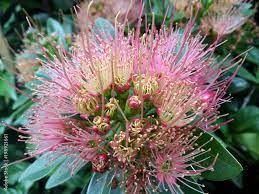
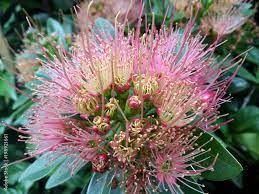
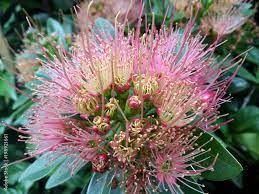

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPnN2--cTpjclui0cHrOepHFXwhLXOMsV-4Q&usqp=CAU - as ../data/flowers\xanthostemon_chrysanthus_flower\7cab4d2a34.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTEzbBkpKW-vYHmlkm1rAx8taWJQhnNfYxjdQ&usqp=CAU - as ../data/flowers\xanthostemon_chrysanthus_flower\c4cd1cb2c9.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRZYn-GuKE0yipxkGiJecVYKaXYCb734JLglQ&usqp=CAU - as ../data/flowers\xanthostemon_chrysanthus_flower\f82ca5d498.jpg
SUCCESS - saved https://singapore.biodiversity.online/images/speciesImages/medium/4189d021-4efb-f4da-37d3-b9ae2a729706.jpg - as ../data/flowers\xanthostemon_chrysanthus_flower\e3eba78d33.jpg
SUCCESS - saved https://photoplusbyritasim.files.wordpress.com/2012/05/dscf3827-400copy.jpg?w=584 - as ../data/flowers\xanthostemon_chrysanthus_flower\2ac19c7bf0.jpg
SUCCESS - saved https://live.staticflickr.com/2011/2354478522_ca21ac12a3_b.jpg - as ../data

In [105]:
for plant in most_common_flowering_plants[242:]:
    try:
        search_and_download(search_term=f'{plant} flower',
                            driver_path=DRIVER_PATH,
                            number_images=100)
    except TypeError:
        for plant in most_common_flowering_plants[most_common_flowering_plants.index(f'{plant}'):]:
            search_and_download(search_term=f'{plant} flower',
                                driver_path=DRIVER_PATH,
                                number_images=100)